*La empresa necesita saber a quién podria aceptar la campaña.*

<table>
<tr>
    <th>Variable</th>
    <th>Descripción</th>
</tr>
<tr>
    <td>CLIENTE</td>
    <td>Identificador del cliente</td>
</tr>
<tr>
    <td>EDAD</td>
    <td>Edad en años del cliente</td>
</tr>
<tr>
    <td>ANIOS_AFILIACION</td>
    <td>Antiguedad del cliente</td>
</tr>
<tr>
    <td>ESTADO_CIVIL</td>
    <td>Estado Civil del cliente</td>
</tr>
<tr>
    <td>SEXO</td>
    <td>Género del cliente</td>
</tr>
<tr>
    <td>CPM</td>
    <td>Consumo promedio del cliente</td>
</tr>
<tr>
    <td>TP</td>
    <td>Ticket promedio de consumo del cliente</td>
</tr>
<tr>
    <td>TXTS</td>
    <td>Número de transacciones (compras) del cliente</td>
</tr>
<tr>
    <td>MEDIO_PAGO</td>
    <td>Medio de pago del cliente</td>
</tr>
<tr>
    <td>TARGET</td>
    <td>Convierte (=1) o no convierte (=0) en la campaña</td>
</tr>    
</table>

---

### Conexion Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


### Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Para los graficos tengan las mismas dimensiones
%matplotlib inline
plt.style.use('ggplot')
#plt.rcParams['figure.figsize'] = (7, 4)

pd.options.display.max_columns = None
sns.set_style('whitegrid')
color = sns.color_palette()

## Rutas

In [ ]:
#Repositorios
path = '/gdrive/MyDrive/BQ - Data Science/BQ - Repositorios/Repositorio_Portafolio/'
filename = "campana_mercadeo.csv"
fullpath = os.path.join(path, filename)

# Lectura de datos

In [ ]:
df = pd.read_csv(fullpath)

In [ ]:
print(df.shape)
df.head(3)

(500, 10)


,CLIENTE,EDAD,ANIOS_AFILIACION,ESTADO_CIVIL,SEXO,CPM,TP,TXTS,MEDIO_PAGO,TARGET
0,1,62,3,C,M,405,27,15,Efectivo,0
1,2,60,8,C,F,387,85,5,tc,1
2,3,59,7,C,F,366,44,8,tc,1


# Data Wrangling

In [ ]:
df.columns

Index(['CLIENTE', 'EDAD', 'ANIOS_AFILIACION', 'ESTADO_CIVIL', 'SEXO', 'CPM',
       'TP', 'TXTS', 'MEDIO_PAGO', 'TARGET'],
      dtype='object')

In [ ]:
df.dtypes

CLIENTE              int64
EDAD                 int64
ANIOS_AFILIACION     int64
ESTADO_CIVIL        object
SEXO                object
CPM                  int64
TP                   int64
TXTS                 int64
MEDIO_PAGO          object
TARGET               int64
dtype: object

In [ ]:
columnsNumeric = ['EDAD', 'ANIOS_AFILIACION','CPM', 'TP', 'TXTS']
columnsString = ['ESTADO_CIVIL','SEXO','MEDIO_PAGO','TARGET']

# **I. Analisis Exploratorio**

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CLIENTE,500.0,NaN,NaN,NaN,250.5,144.481833,1.0,125.75,250.5,375.25,500.0
EDAD,500.0,NaN,NaN,NaN,50.442,14.436046,18.0,39.0,49.0,61.0,90.0
ANIOS_AFILIACION,500.0,NaN,NaN,NaN,5.248,2.450818,0.0,3.0,6.0,7.0,8.0
ESTADO_CIVIL,500,4,C,292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SEXO,500,2,F,292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CPM,500.0,NaN,NaN,NaN,368.688,306.92873,11.0,177.0,275.5,471.25,2879.0
TP,500.0,NaN,NaN,NaN,82.864,68.65307,6.0,37.0,63.0,105.0,459.0
TXTS,500.0,NaN,NaN,NaN,6.286,5.990658,1.0,3.0,4.0,8.0,54.0
MEDIO_PAGO,500,3,tc,258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TARGET,500.0,NaN,NaN,NaN,0.338,0.473502,0.0,0.0,0.0,1.0,1.0


## Revision Objetivo

Porcentaje de Creditos Aprobados : 0.66
Porcentaje de Creditos Rechazados : 0.34


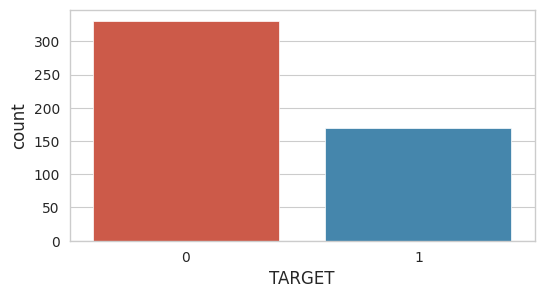

In [ ]:
plt.figure(figsize=(6,3))
sns.countplot(x='TARGET', data=df);

print('Porcentaje de Creditos Aprobados : %.2f' % (df['TARGET'].value_counts()[0] / len(df)))
print('Porcentaje de Creditos Rechazados : %.2f' % (df['TARGET'].value_counts()[1] / len(df)))

## Analisis Univariado

### Categoricas

ESTADO_CIVIL
C    292
D     16
S    182
V     10
dtype: int64


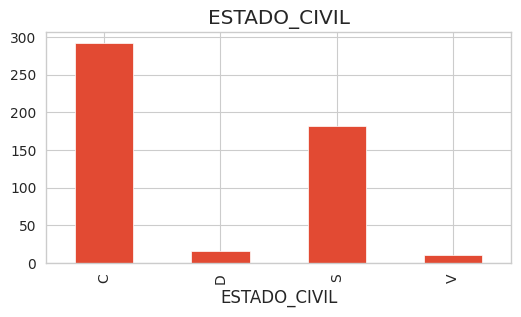

SEXO
F    292
M    208
dtype: int64


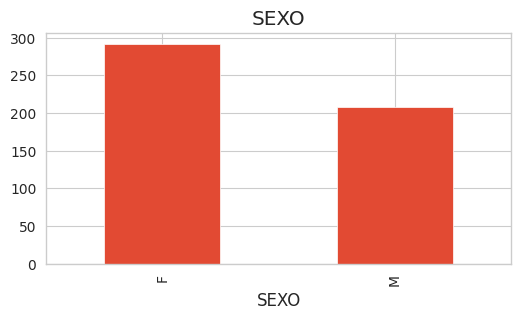

MEDIO_PAGO
Cualquiera      5
Efectivo      237
tc            258
dtype: int64


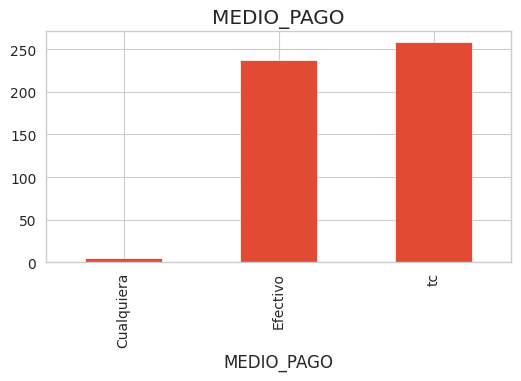

TARGET
0    331
1    169
dtype: int64


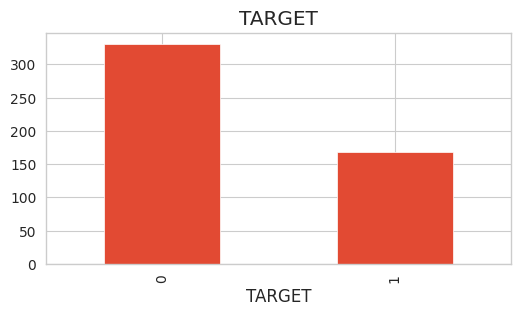

In [ ]:
for x in columnsString:
  plt.figure(figsize=(6,3))
  print(df.groupby(x).size())
  plt.title(x)
  df.fillna("--NULL").groupby(x)[x].count().plot(kind = "bar")
  plt.show()

### Numericas

In [ ]:
df[columnsNumeric].describe().T

,count,mean,std,min,25%,50%,75%,max
EDAD,500.0,50.442,14.436046,18.0,39.0,49.0,61.00,90.0
ANIOS_AFILIACION,500.0,5.248,2.450818,0.0,3.0,6.0,7.00,8.0
CPM,500.0,368.688,306.928730,11.0,177.0,275.5,471.25,2879.0
TP,500.0,82.864,68.653070,6.0,37.0,63.0,105.00,459.0
TXTS,500.0,6.286,5.990658,1.0,3.0,4.0,8.00,54.0


In [ ]:
df.groupby('TARGET').median() # Mediana no se ve afectada con valores atípicos

,CLIENTE,EDAD,ANIOS_AFILIACION,CPM,TP,TXTS
TARGET,,,,,,
0,257.0,47.0,5.0,225.0,63.0,3.0
1,236.0,54.0,7.0,453.0,63.0,7.0


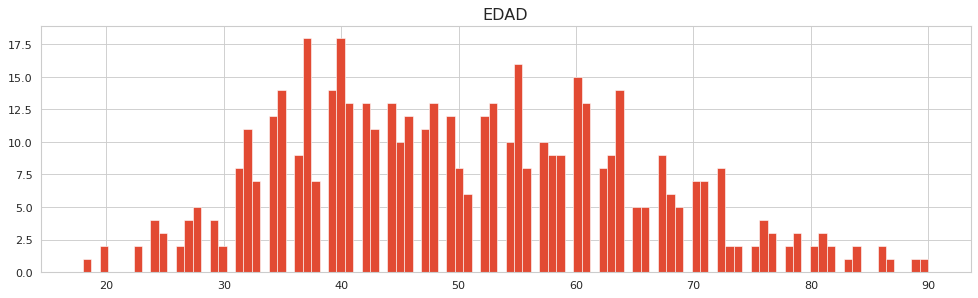

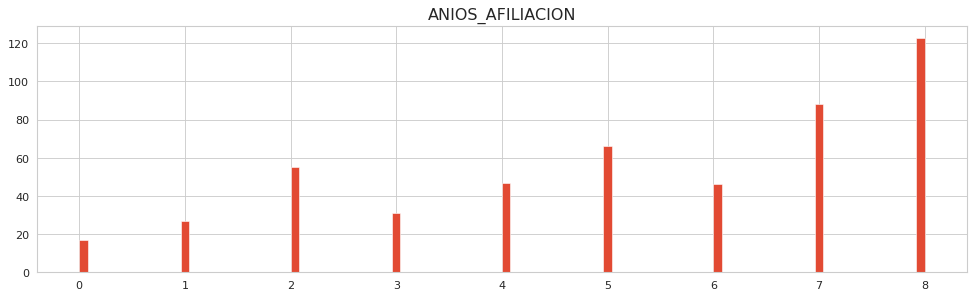

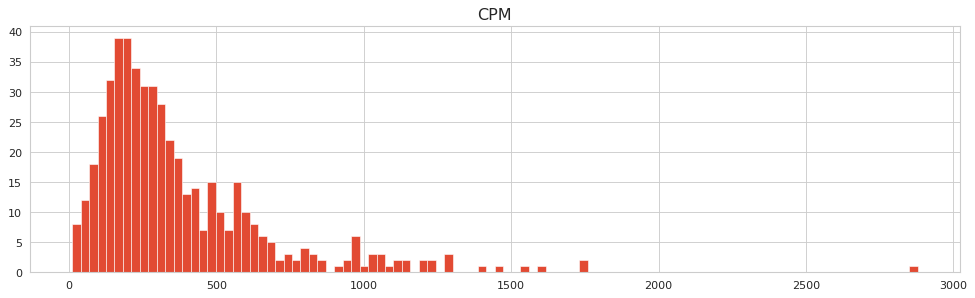

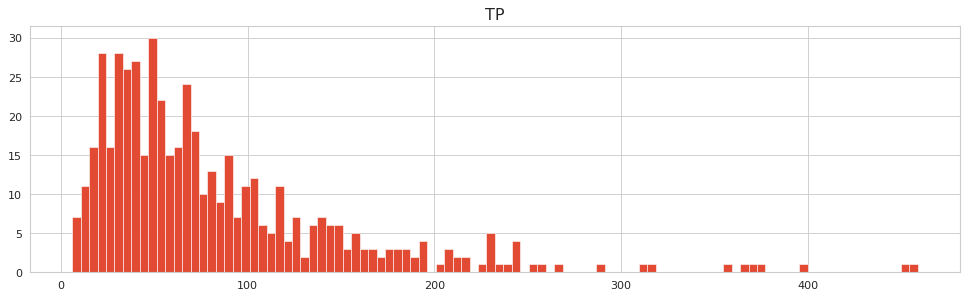

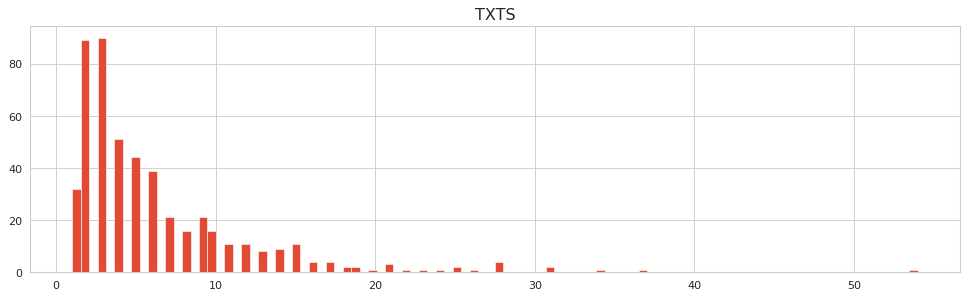

In [ ]:
for x in columnsNumeric:
  plt.figure(figsize=(15,4), dpi=80)
  plt.title(df[x].name)
  plt.hist(df[x],bins=100)
  plt.show()

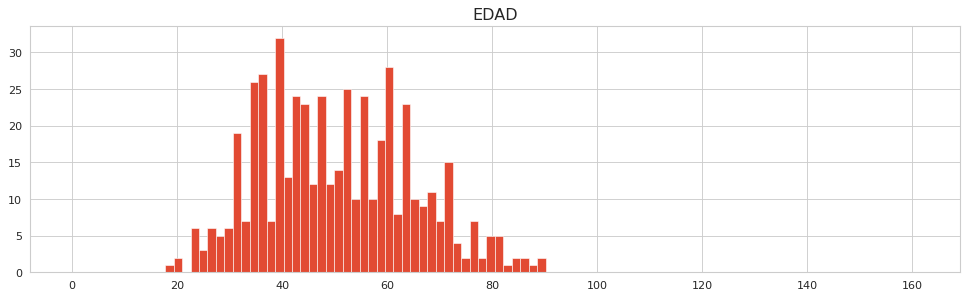

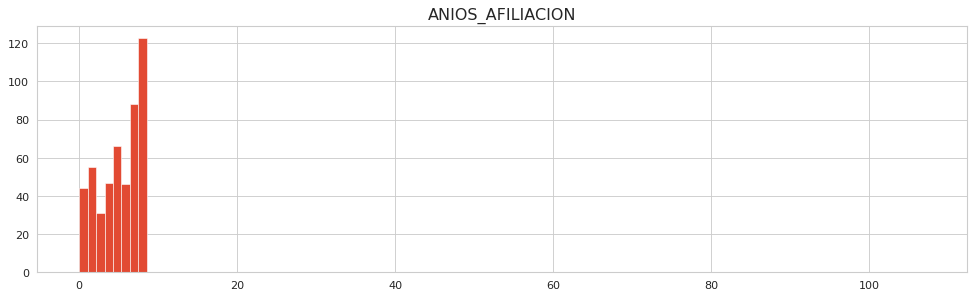

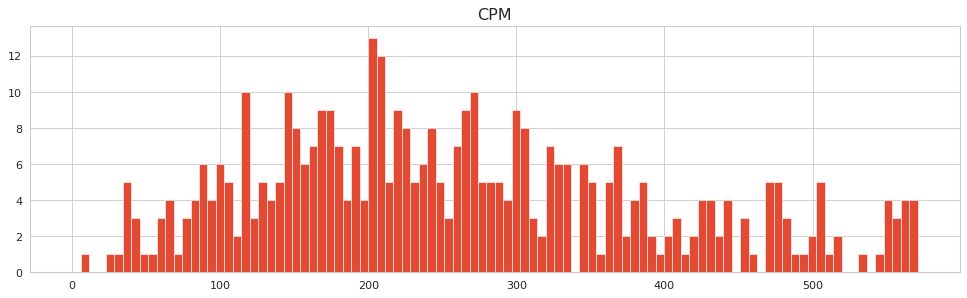

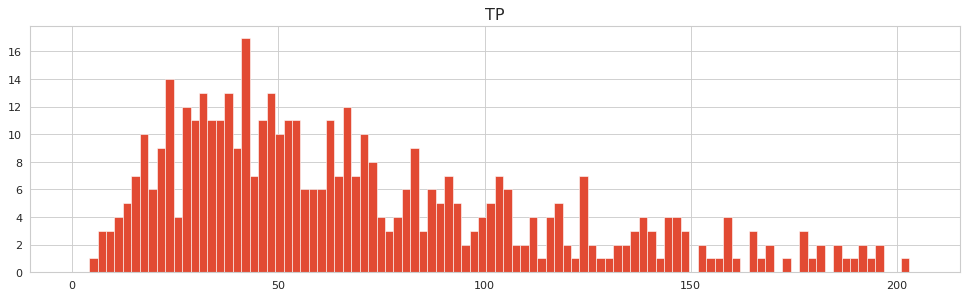

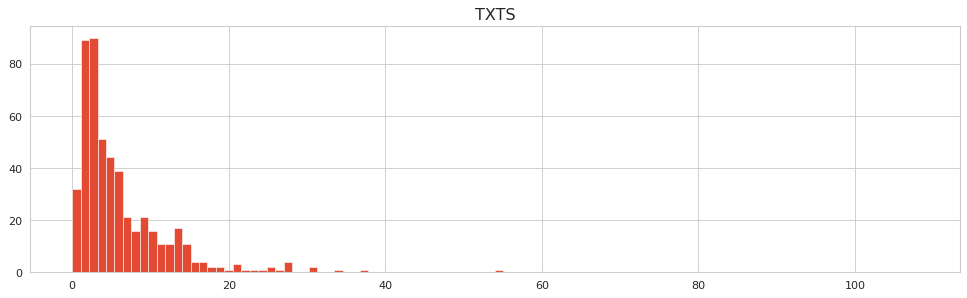

In [ ]:
# No consideramos las colas (outliers) para ver mejor la distribucion
for x in columnsNumeric:
  plt.figure(figsize=(15,4), dpi=80)
  Q03= int(df[x].quantile(0.75))+100
  plt.title(df[x].name)
  plt.hist(df[x],bins=100,range=(0,Q03))
  plt.show()

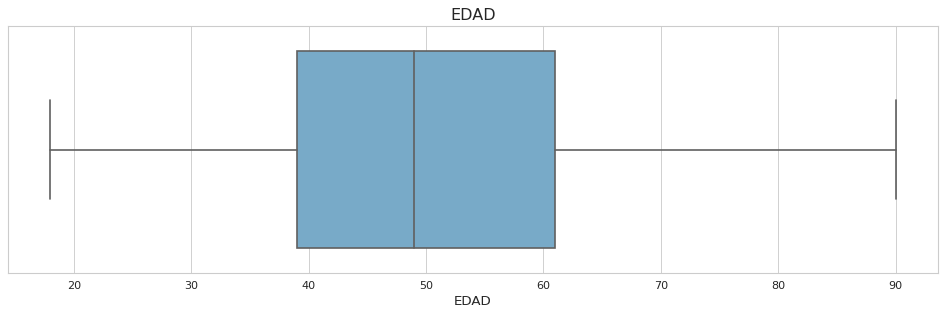

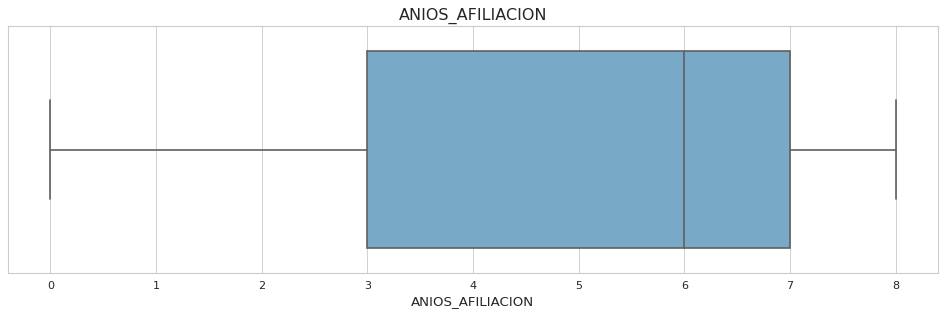

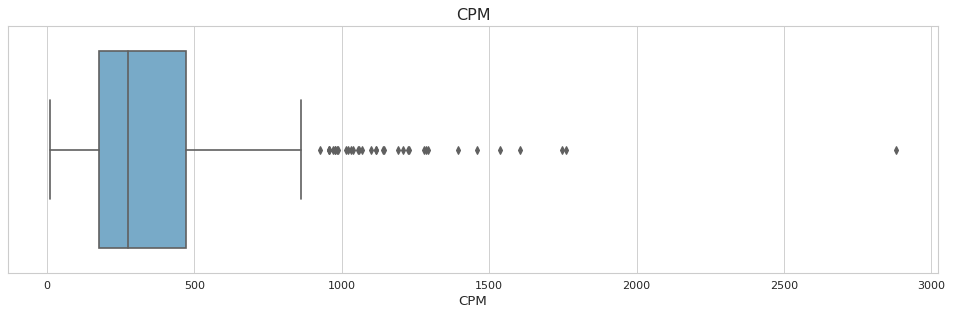

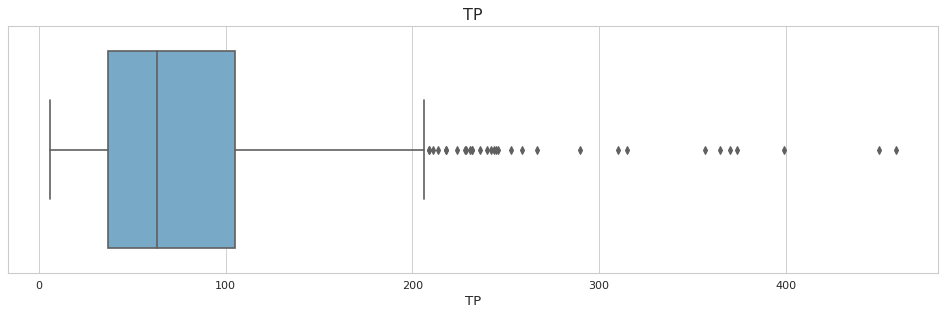

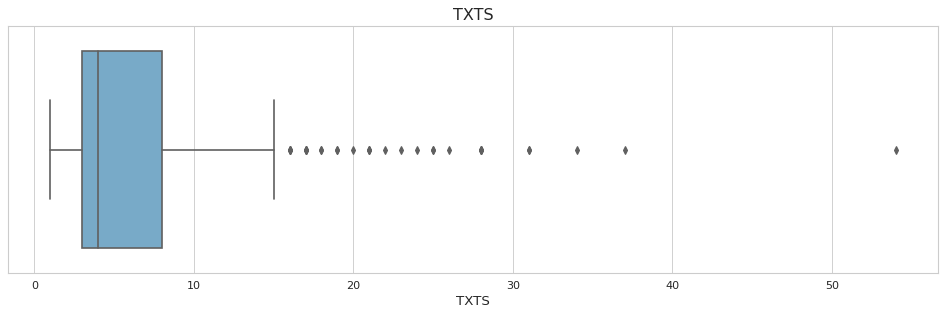

In [ ]:
# Grafico de Cajas para revision de atipicos
for x in columnsNumeric:
  plt.figure(figsize=(15,4), dpi=80)
  plt.title(df[x].name)
  sns.boxplot(x=df[x], palette="Blues")
  plt.show()

## Anlisis Bivariado

### Categoricas

In [ ]:
columnsString

['ESTADO_CIVIL', 'SEXO', 'MEDIO_PAGO', 'TARGET']

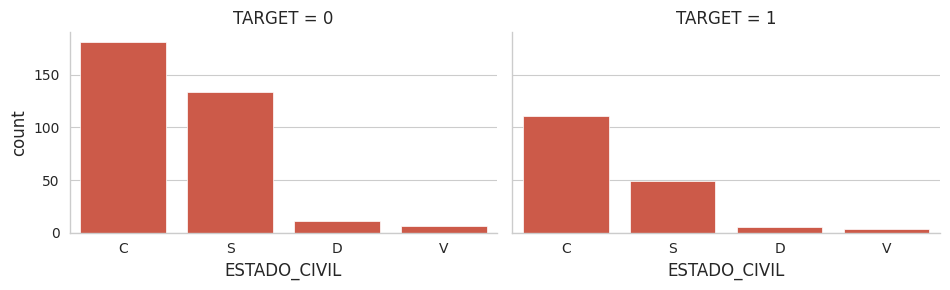

In [ ]:
# ESTADO_CIVIL

grid = sns.FacetGrid(df,col='TARGET', aspect=1.6)
grid.map(sns.countplot, 'ESTADO_CIVIL');

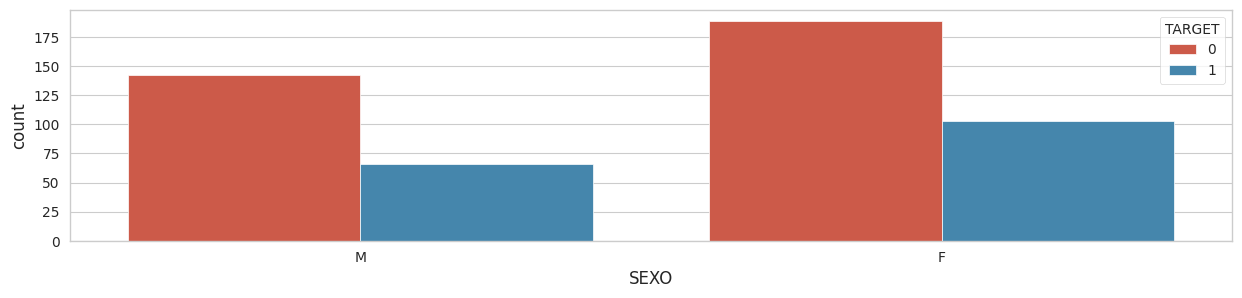

In [ ]:
# SEXO
plt.figure(figsize=(15,3))
sns.countplot(x='SEXO', hue='TARGET', data=df);

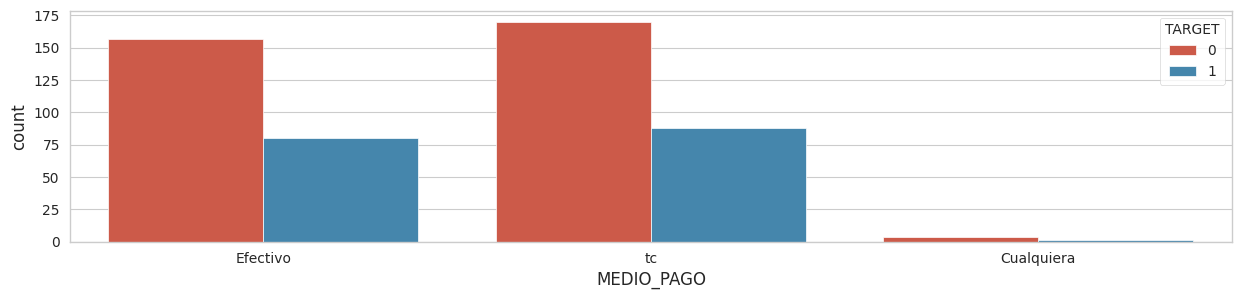

In [ ]:
# MEDIO_PAGO
plt.figure(figsize=(15,3))
sns.countplot(x='MEDIO_PAGO', hue='TARGET', data=df);

### Numericas

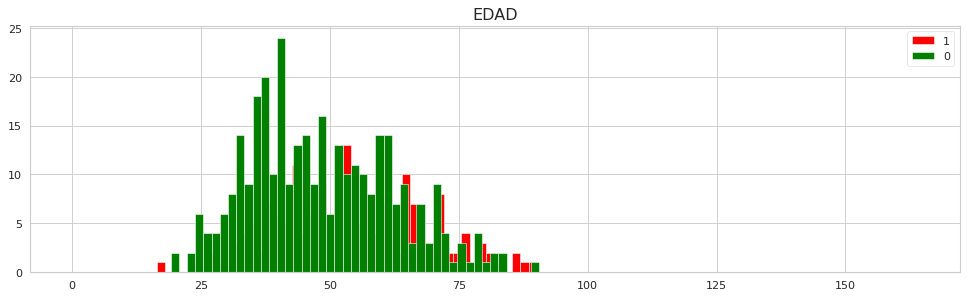

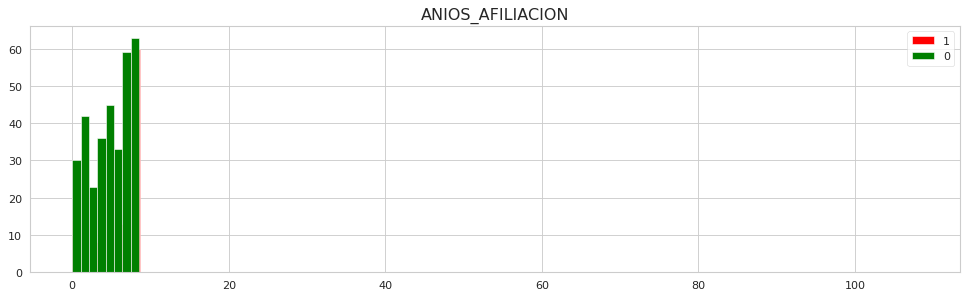

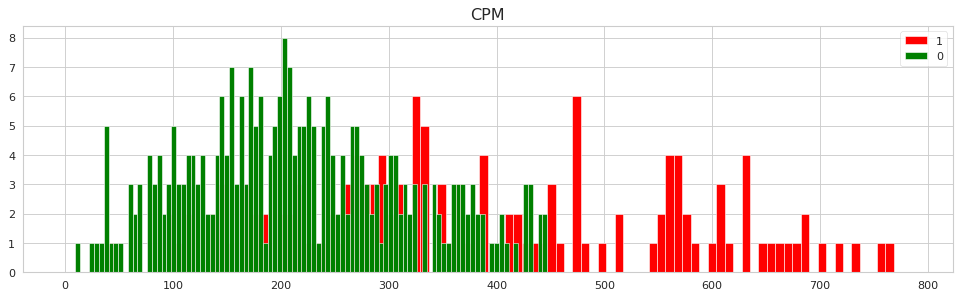

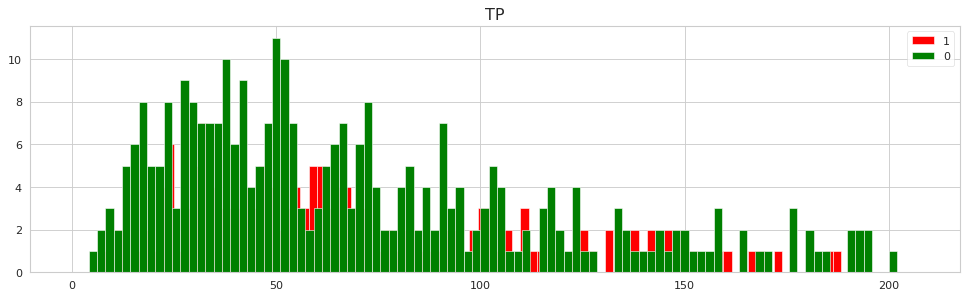

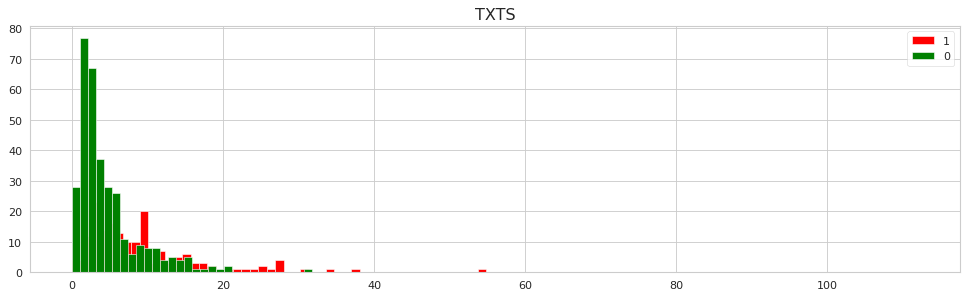

In [ ]:
# Analizando variables numericas con respecto al target
for x in columnsNumeric:
  plt.figure(figsize=(15,4), dpi=80)
  x1 = df.loc[df['TARGET']==1,x]  #Serie
  x2 = df.loc[df['TARGET']==0,x]  #serie

  Q03x1 = int(pd.DataFrame(x1)[x].quantile(0.75))+100  # Q3 de la serie
  Q03x2 = int(pd.DataFrame(x2)[x].quantile(0.75))+100  # Q3 de la serie

  #se muestran las densidades
  plt.title(df[x].name)
  plt.hist(x1,bins=100,color='r',range=(0,Q03x1),label=1)
  plt.hist(x2,bins=100,color='g',range=(0,Q03x2),label=0)
  plt.legend()
  plt.show()

In [ ]:
!pip install plotly

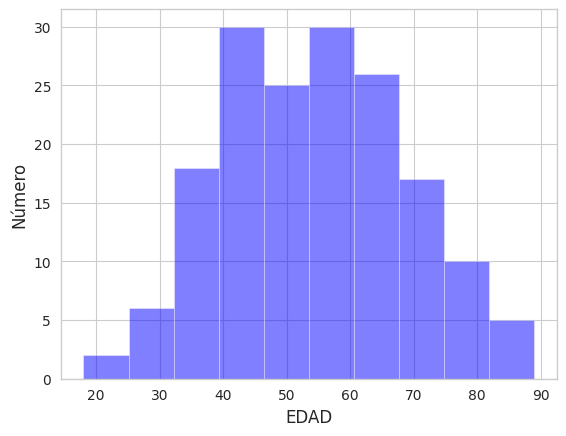

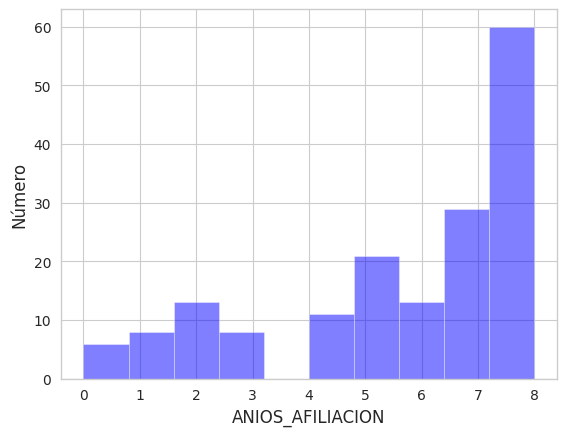

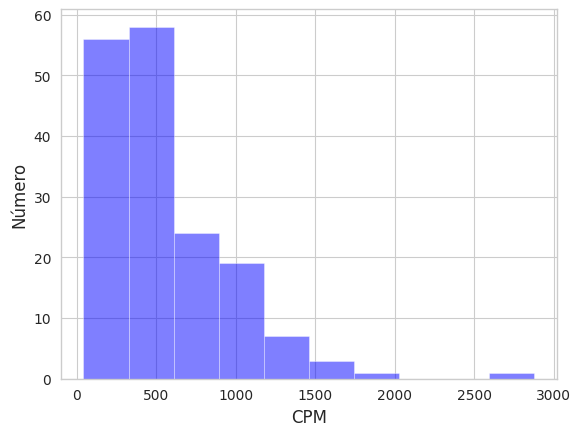

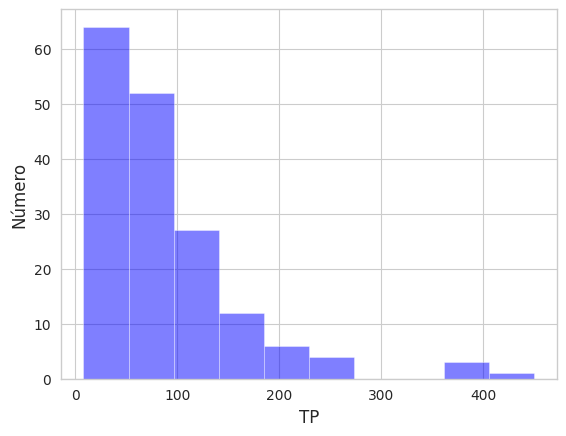

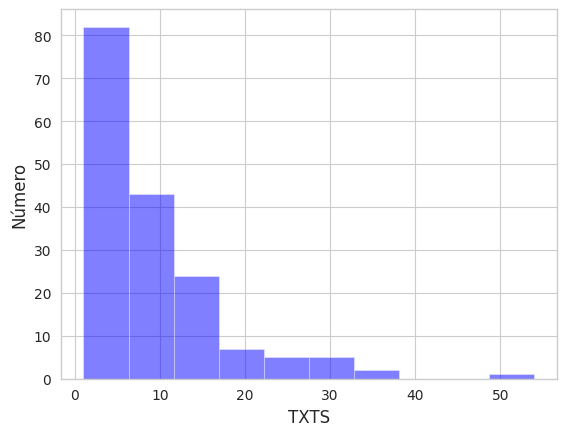

In [ ]:
num_bins = 10
data_0 = df[df.TARGET == 1]

for i in columnsNumeric:
    n, bins, patches = plt.hist(data_0[i], num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel(i)
    plt.ylabel('Número')
    plt.show()

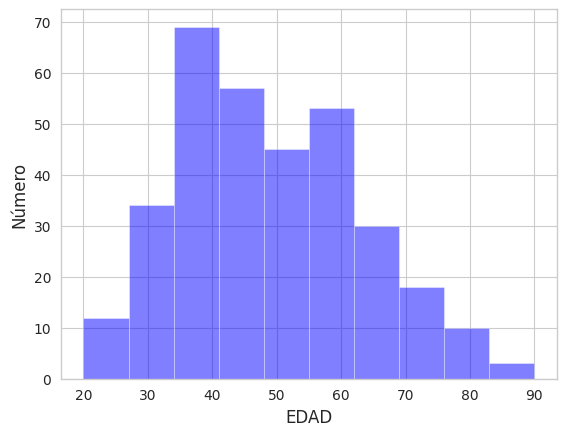

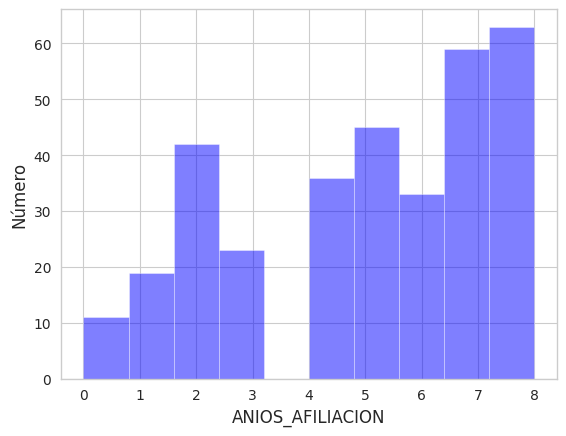

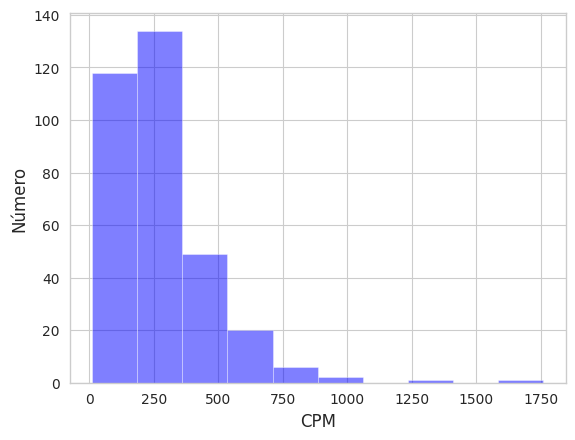

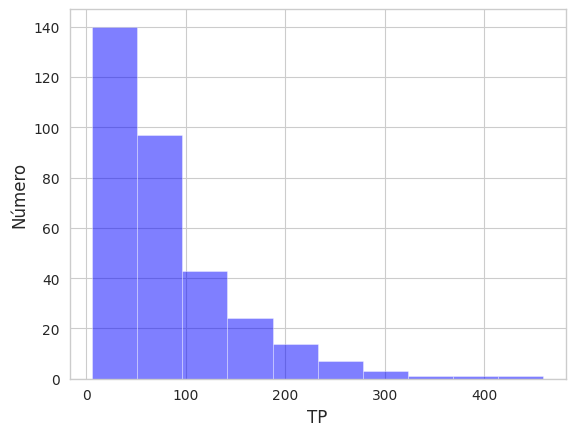

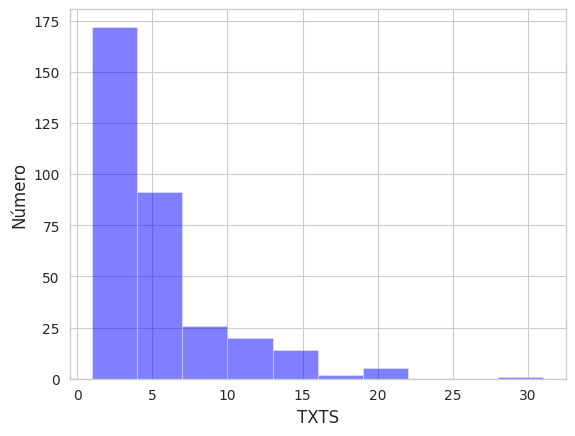

In [ ]:
num_bins = 10
data_0 = df[df.TARGET == 0]

for i in columnsNumeric:
    n, bins, patches = plt.hist(data_0[i], num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel(i)
    plt.ylabel('Número')
    plt.show()

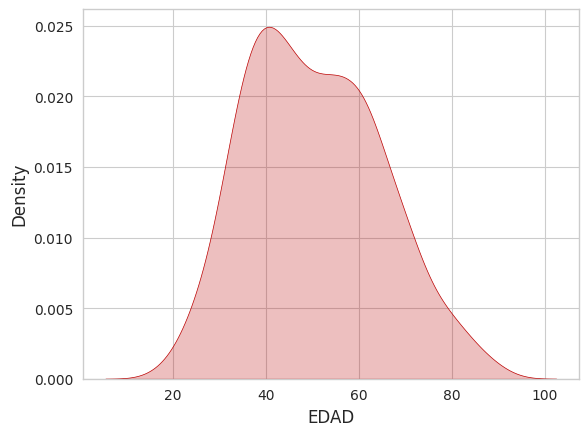

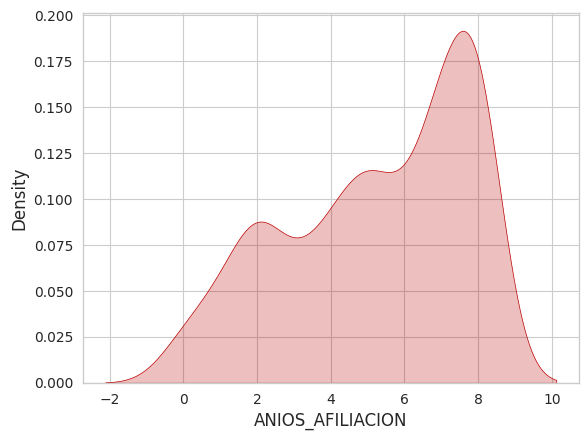

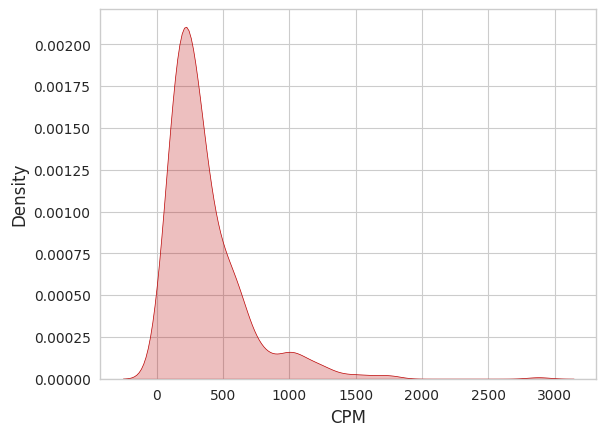

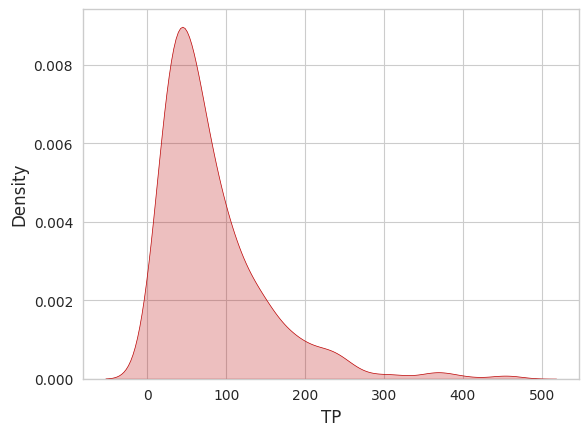

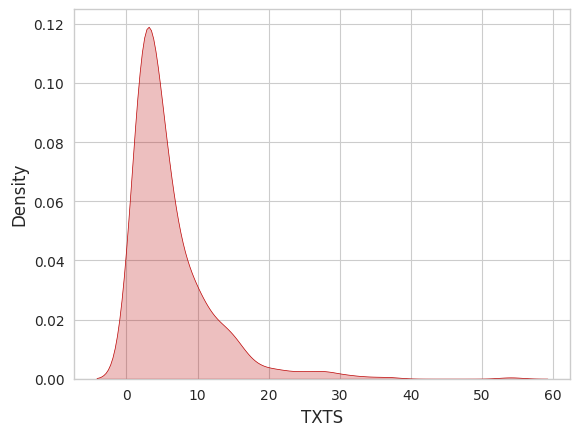

In [ ]:
data_0 = df
for i in columnsNumeric:
    sns.kdeplot(data_0[i],shade = True,vertical = False,kernel = 'gau',cumulative = False,color = "#BB0000")
    plt.show()

In [ ]:
from plotly.offline import download_plotlyjs, plot, iplot
from plotly.graph_objs import *

In [ ]:
# Edad de los que NO aceptan la campaña
geom_we = Histogram(x = df.query('TARGET == 0')['EDAD'],
               marker = {'color': '#5555FF',
                         'line': {'color': '#FFFFFF',
                                  'width': 1},
                         'opacity': 0.6},
                   name = 'No Aceptan')

# Edad de los que SI aceptan la campaña
geom_ee = Histogram(x = df.query('TARGET == 1')['EDAD'],
               marker = {'color': '#55FF55',
                         'line': {'color': '#FFFFFF',
                                  'width': 1},
                         'opacity': 0.6},
                   name = 'Aceptan')

lay = Layout(
    title = 'Edad No Aceptan vs Edad Aceptan',
    barmode = 'overlay'
)

fig = Figure(data = [geom_we, geom_ee], layout = lay)

iplot(fig)

In [ ]:
# Consumo Promedio Mensual de los que NO aceptan la campaña
geom_we = Histogram(x = df.query('TARGET == 0')['CPM'],
               marker = {'color': '#5555FF',
                         'line': {'color': '#FFFFFF',
                                  'width': 1},
                         'opacity': 0.6},
                   name = 'No Aceptan')

# Consumo Promedio Mensual de los que SI aceptan la campaña
geom_ee = Histogram(x = df.query('TARGET == 1')['CPM'],
               marker = {'color': '#55FF55',
                         'line': {'color': '#FFFFFF',
                                  'width': 1},
                         'opacity': 0.6},
                   name = 'Aceptan')

lay = Layout(
    title = 'Consumo Promedio Mensual No Aceptan vs Aceptan',
    barmode = 'overlay'
)

fig = Figure(data = [geom_we, geom_ee], layout = lay)

iplot(fig)

In [ ]:
df_prub = df.copy()
df_prub['TARGET_LB'] = np.where(df_prub['TARGET']==0,'N','Y')

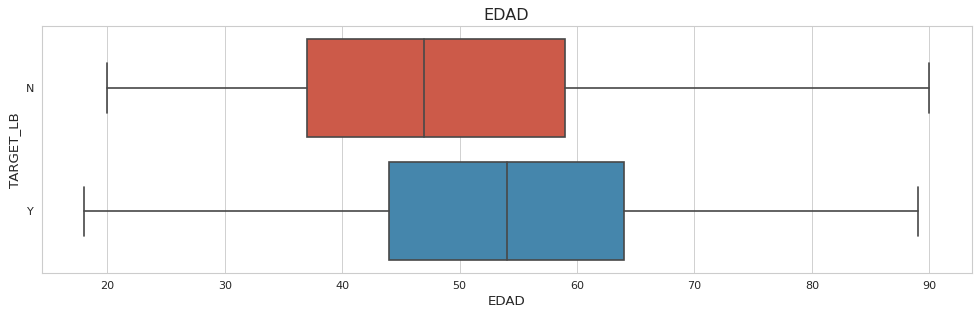

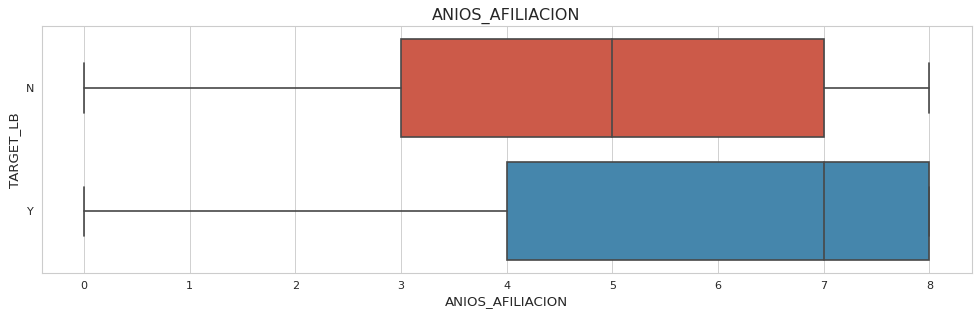

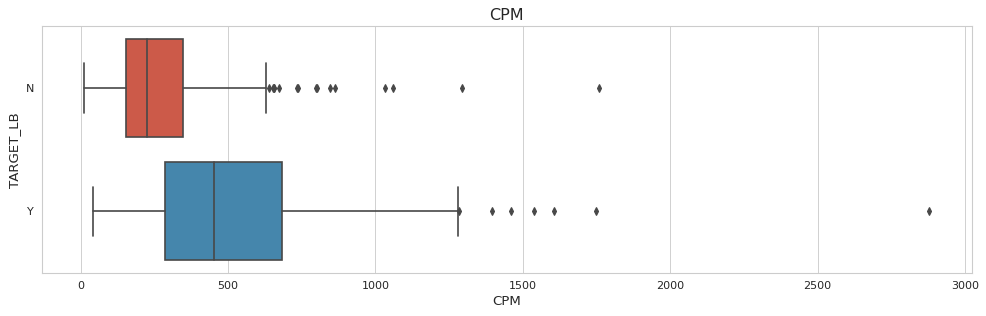

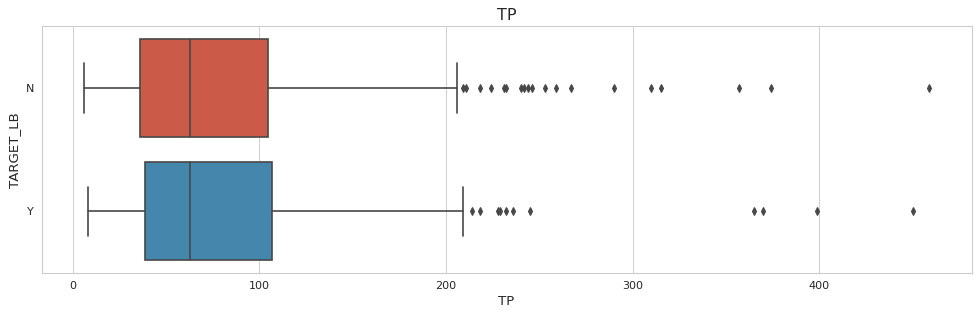

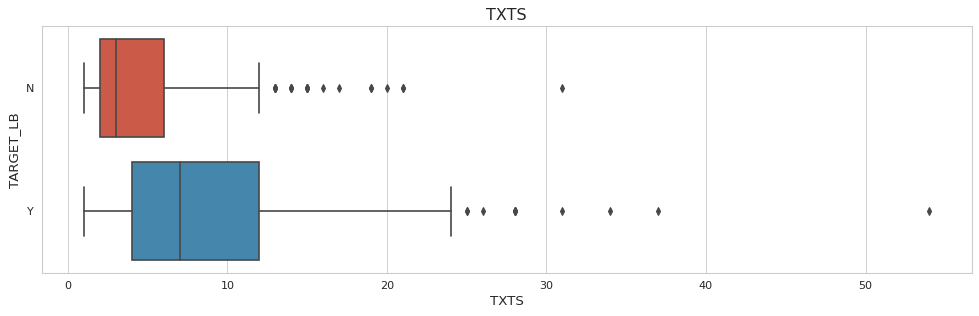

In [ ]:
# Grafico de cajas respecto al target
for x in columnsNumeric:
  plt.figure(figsize=(15,4), dpi=80)
  plt.title(df_prub[x].name)
  sns.boxplot(x=df_prub[x],y=df_prub['TARGET_LB'])
  plt.show()

## Analisis Multivariado

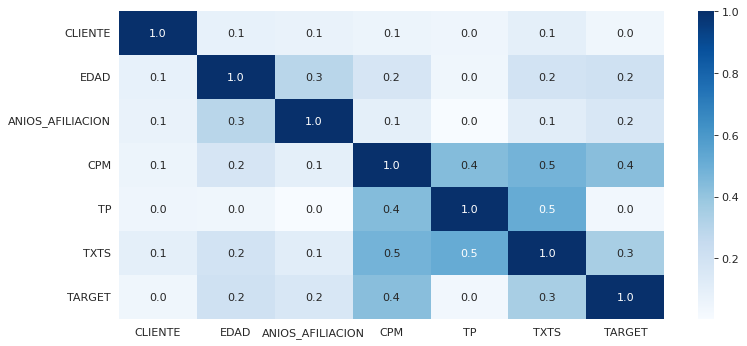

In [ ]:
# Analizamos la correlacion de las variables
# Spearman: Para variables numericas. No asume normalidad
plt.figure(figsize=(11,5), dpi=80)
sns.heatmap(abs(df.corr(method='spearman')),annot=True,fmt='.1f',cmap='Blues')
plt.show()

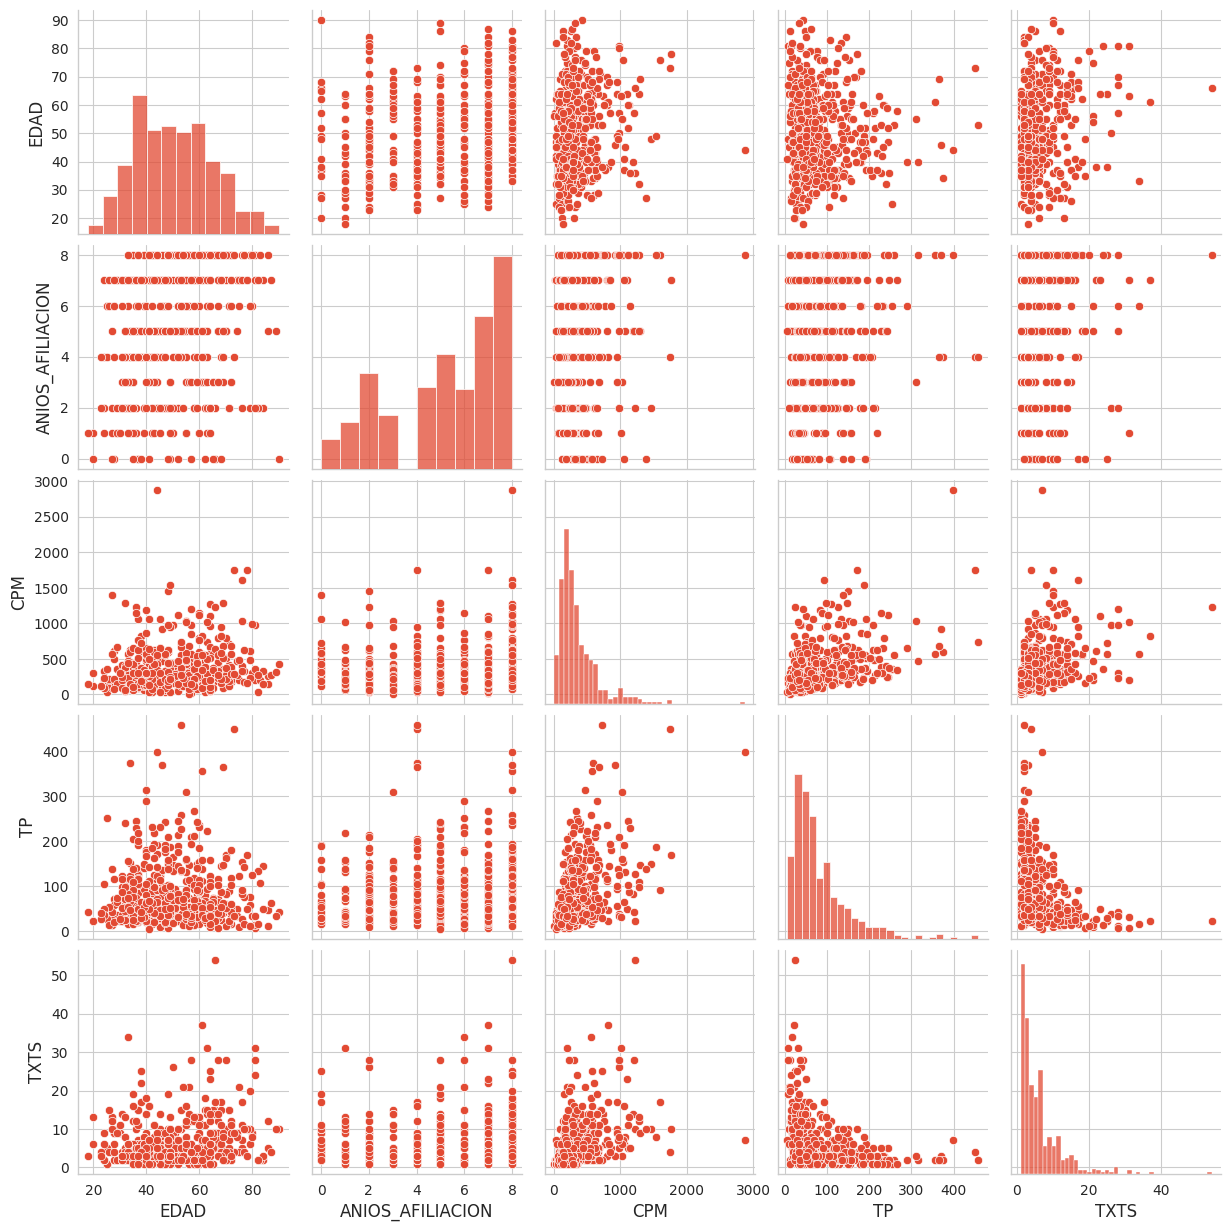

In [ ]:
sns.pairplot(df[columnsNumeric])

## Asimetria

Calculamos el Coeficiente de Asimetría

In [ ]:
from scipy import stats
import pandas as pd

In [ ]:
data_ca = {'Variable' : columnsNumeric,
       'Coeficiente_Asim' : stats.skew(df[columnsNumeric])}
asim = pd.DataFrame(data_ca)
asim

,Variable,Coeficiente_Asim
0,EDAD,0.299534
1,ANIOS_AFILIACION,-0.517769
2,CPM,2.587872
3,TP,2.075812
4,TXTS,2.758936


## Tratamiento de Nulos

In [ ]:
df.isnull().sum().sort_values(ascending=False)

CLIENTE             0
EDAD                0
ANIOS_AFILIACION    0
ESTADO_CIVIL        0
SEXO                0
CPM                 0
TP                  0
TXTS                0
MEDIO_PAGO          0
TARGET              0
dtype: int64

In [ ]:
df.isnull().sum()/df.shape[0]*100

CLIENTE             0.0
EDAD                0.0
ANIOS_AFILIACION    0.0
ESTADO_CIVIL        0.0
SEXO                0.0
CPM                 0.0
TP                  0.0
TXTS                0.0
MEDIO_PAGO          0.0
TARGET              0.0
dtype: float64

# **II. Recodificacion Data**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
for i in columnsString:
    le = LabelEncoder()
    le.fit(df[str(i)])
    df[str(i)]=le.transform(df[str(i)])

In [ ]:
print(df.shape)
df.head(3)

(500, 10)


,CLIENTE,EDAD,ANIOS_AFILIACION,ESTADO_CIVIL,SEXO,CPM,TP,TXTS,MEDIO_PAGO,TARGET
0,1,62,3,0,1,405,27,15,1,0
1,2,60,8,0,0,387,85,5,2,1
2,3,59,7,0,0,366,44,8,2,1


## Estandarizacion

In [ ]:
data_inputs = []
data_inputs = df.iloc[:,:-1]
data_inputs = data_inputs.iloc[:,1:]
data_inputs.head(3)

,EDAD,ANIOS_AFILIACION,ESTADO_CIVIL,SEXO,CPM,TP,TXTS,MEDIO_PAGO
0,62,3,0,1,405,27,15,1
1,60,8,0,0,387,85,5,2
2,59,7,0,0,366,44,8,2


In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
transformer = RobustScaler().fit(data_inputs)

data_inputs_s = transformer.transform(data_inputs)
inputs = data_inputs.columns.tolist()
data_inputs_s = pd.DataFrame(data_inputs_s,columns=inputs)
data_inputs_s.head(3)

,EDAD,ANIOS_AFILIACION,ESTADO_CIVIL,SEXO,CPM,TP,TXTS,MEDIO_PAGO
0,0.590909,-0.75,0.0,1.0,0.440102,-0.529412,2.2,-1.0
1,0.500000,0.50,0.0,0.0,0.378929,0.323529,0.2,0.0
2,0.454545,0.25,0.0,0.0,0.307562,-0.279412,0.8,0.0


Consolidamos las variables transformadas y el target

In [ ]:
data_fin = pd.concat([data_inputs_s,df.iloc[:,-1]],axis=1)
print(data_fin.shape)
data_fin.head(3)

(500, 9)


,EDAD,ANIOS_AFILIACION,ESTADO_CIVIL,SEXO,CPM,TP,TXTS,MEDIO_PAGO,TARGET
0,0.590909,-0.75,0.0,1.0,0.440102,-0.529412,2.2,-1.0,0
1,0.500000,0.50,0.0,0.0,0.378929,0.323529,0.2,0.0,1
2,0.454545,0.25,0.0,0.0,0.307562,-0.279412,0.8,0.0,1


In [ ]:
inputs_iv = data_fin.columns[:-1].values.tolist()
inputs_iv

['EDAD',
 'ANIOS_AFILIACION',
 'ESTADO_CIVIL',
 'SEXO',
 'CPM',
 'TP',
 'TXTS',
 'MEDIO_PAGO']

# **IV. Modelado**

In [ ]:
X = data_fin[inputs_iv].values
y=data_fin.iloc[:,-1].values

## Particion Muestral

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

In [ ]:
# Distribucion real del target!
data_fin.TARGET.value_counts()/data_fin.shape[0]*100

0    99.421135
1     0.578865
Name: is_fraud, dtype: float64

In [ ]:
# Distribucion del target de entrenamiento!
y_train.value_counts()/y_train.shape[0]*100

0    99.421157
1     0.578843
Name: is_fraud, dtype: float64

In [ ]:
# Distribucion del target de prueba!
y_test.value_counts()/y_test.shape[0]*100

0    99.421084
1     0.578916
Name: is_fraud, dtype: float64

## **6.1 KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=50, p=2, metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [ ]:
prob_train =  knn.predict_proba(X_train)[:, 1]
prob_test =  knn.predict_proba(X_test)[:, 1]

In [ ]:
a = prob_train >= 0.3
b = prob_test >= 0.3

Y_pred_train= a * 1
Y_pred_test= b * 1

In [ ]:
Y_pred_test

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [ ]:
from sklearn import metrics

In [ ]:
# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_train,Y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,Y_pred_test)
print(cm_test)
print('\n')

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_train,Y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,Y_pred_test)
print(accuracy_test)
print('\n')

# Precision
print("Precision: Train")
precision_train=metrics.precision_score(y_train,Y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,Y_pred_test)
print(precision_test)
print('\n')

# Recall
print("Recall: Train")
recall_train=metrics.recall_score(y_train,Y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,Y_pred_test)
print(recall_test)

Matriz confusion: Train
[[163  69]
 [ 32  86]]
Matriz confusion: Test
[[66 33]
 [21 30]]


Accuracy: Train
0.7114285714285714
Accuracy: Test
0.64


Precision: Train
0.5548387096774193
Precision: Test
0.47619047619047616


Recall: Train
0.7288135593220338
Recall: Test
0.5882352941176471


In [ ]:
print(metrics.classification_report(y_test,Y_pred_test))

In [ ]:
metrics.log_loss(y_test,Y_pred_test)

## **6.2 Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

prob_train =  nb.predict_proba(X_train)[:, 1]
prob_test =  nb.predict_proba(X_test)[:, 1]

In [ ]:
a = prob_train >= 0.3
b = prob_test >= 0.3

Y_pred_train= a * 1
Y_pred_test= b * 1

In [ ]:
# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_train,Y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,Y_pred_test)
print(cm_test)
print('\n')

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_train,Y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,Y_pred_test)
print(accuracy_test)
print('\n')

# Precision
print("Precision: Train")
precision_train=metrics.precision_score(y_train,Y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,Y_pred_test)
print(precision_test)
print('\n')

# Recall
print("Recall: Train")
recall_train=metrics.recall_score(y_train,Y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,Y_pred_test)
print(recall_test)

Matriz confusion: Train
[[199  33]
 [ 46  72]]
Matriz confusion: Test
[[82 17]
 [27 24]]


Accuracy: Train
0.7742857142857142
Accuracy: Test
0.7066666666666667


Precision: Train
0.6857142857142857
Precision: Test
0.5853658536585366


Recall: Train
0.6101694915254238
Recall: Test
0.47058823529411764


In [ ]:
print(metrics.classification_report(y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        99
           1       0.59      0.47      0.52        51

    accuracy                           0.71       150
   macro avg       0.67      0.65      0.66       150
weighted avg       0.70      0.71      0.70       150



In [ ]:
metrics.log_loss(y_test,Y_pred_test)

10.57280499414103

## **6.3 Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF = RandomForestClassifier(n_estimators=1000, random_state=10)
RF.fit(X_train, y_train)

prob_train =  RF.predict_proba(X_train)[:, 1]
prob_test =  RF.predict_proba(X_test)[:, 1]

In [ ]:
a = prob_train >= 0.3
b = prob_test >= 0.3

Y_pred_train= a * 1
Y_pred_test= b * 1

In [ ]:
# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_train,Y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,Y_pred_test)
print(cm_test)
print('\n')

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_train,Y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,Y_pred_test)
print(accuracy_test)
print('\n')

# Precision
print("Precision: Train")
precision_train=metrics.precision_score(y_train,Y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,Y_pred_test)
print(precision_test)
print('\n')

# Recall
print("Recall: Train")
recall_train=metrics.recall_score(y_train,Y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,Y_pred_test)
print(recall_test)

Matriz confusion: Train
[[228   4]
 [  0 118]]
Matriz confusion: Test
[[63 36]
 [20 31]]


Accuracy: Train
0.9885714285714285
Accuracy: Test
0.6266666666666667


Precision: Train
0.9672131147540983
Precision: Test
0.4626865671641791


Recall: Train
1.0
Recall: Test
0.6078431372549019


In [ ]:
print(metrics.classification_report(y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       0.76      0.64      0.69        99
           1       0.46      0.61      0.53        51

    accuracy                           0.63       150
   macro avg       0.61      0.62      0.61       150
weighted avg       0.66      0.63      0.64       150



In [ ]:
metrics.log_loss(y_test,Y_pred_test)

13.456297265270404

## **6.4 Perceptron**

In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:
ppn = Perceptron(eta0=0.01, random_state=1)
ppn.fit(X_train, y_train)

Y_pred_train =  ppn.predict(X_train)
Y_pred_test =  ppn.predict(X_test)

In [ ]:
# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_train,Y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,Y_pred_test)
print(cm_test)
print('\n')

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_train,Y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,Y_pred_test)
print(accuracy_test)
print('\n')

# Precision
print("Precision: Train")
precision_train=metrics.precision_score(y_train,Y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,Y_pred_test)
print(precision_test)
print('\n')

# Recall
print("Recall: Train")
recall_train=metrics.recall_score(y_train,Y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,Y_pred_test)
print(recall_test)

Matriz confusion: Train
[[181  51]
 [ 47  71]]
Matriz confusion: Test
[[74 25]
 [24 27]]


Accuracy: Train
0.72
Accuracy: Test
0.6733333333333333


Precision: Train
0.5819672131147541
Precision: Test
0.5192307692307693


Recall: Train
0.6016949152542372
Recall: Test
0.5294117647058824


In [ ]:
print(metrics.classification_report(y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75        99
           1       0.52      0.53      0.52        51

    accuracy                           0.67       150
   macro avg       0.64      0.64      0.64       150
weighted avg       0.67      0.67      0.67       150



In [ ]:
metrics.log_loss(y_test,Y_pred_test)

11.774260107111605

## **6.5 Perceptrón Multicapa**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
classifier = MLPClassifier(hidden_layer_sizes=(10,100,100,10), max_iter=1000000,activation = 'relu',solver='adam',random_state=1)
classifier.fit(X_train, y_train)

prob_train =  classifier.predict_proba(X_train)[:, 1]
prob_test =  classifier.predict_proba(X_test)[:, 1]

In [ ]:
a = prob_train >= 0.3
b = prob_test >= 0.3

Y_pred_train= a * 1
Y_pred_test= b * 1

In [ ]:
# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_train,Y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,Y_pred_test)
print(cm_test)
print('\n')

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_train,Y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,Y_pred_test)
print(accuracy_test)
print('\n')

# Precision
print("Precision: Train")
precision_train=metrics.precision_score(y_train,Y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,Y_pred_test)
print(precision_test)
print('\n')

# Recall
print("Recall: Train")
recall_train=metrics.recall_score(y_train,Y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,Y_pred_test)
print(recall_test)

Matriz confusion: Train
[[227   5]
 [  0 118]]
Matriz confusion: Test
[[76 23]
 [28 23]]


Accuracy: Train
0.9857142857142858
Accuracy: Test
0.66


Precision: Train
0.959349593495935
Precision: Test
0.5


Recall: Train
1.0
Recall: Test
0.45098039215686275


In [ ]:
print(metrics.classification_report(y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75        99
           1       0.50      0.45      0.47        51

    accuracy                           0.66       150
   macro avg       0.62      0.61      0.61       150
weighted avg       0.65      0.66      0.66       150



In [ ]:
metrics.log_loss(y_test,Y_pred_test)

12.254842152299831

## **6.6 GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
            'hidden_layer_sizes': [
             (1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,), (12,),(13,),(14,),(15,),(16,),(17,),(18,),(19,),(20,),(21,)
             ]
        }
       ]

In [ ]:
param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
            'hidden_layer_sizes': [
             (10,10),(10,10,10),(10,100),(10,100,10),(10,100,100)
             ]
        }
       ]

In [ ]:
# cv: cross validation
clf = GridSearchCV(MLPClassifier(max_iter=1000,random_state=123), param_grid, cv=3,
                           scoring='f1')
clf.fit(X_train, y_train)


print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:
{'activation': 'tanh', 'hidden_layer_sizes': (10, 100, 100), 'solver': 'sgd'}


In [ ]:
classifier = MLPClassifier(hidden_layer_sizes=(10,100,100), max_iter=1000,activation = 'tanh',solver='sgd',random_state=123)
classifier.fit(X_train, y_train)

prob_train =  classifier.predict_proba(X_train)[:, 1]
prob_test =  classifier.predict_proba(X_test)[:, 1]

In [ ]:
a = prob_train >= 0.3
b = prob_test >= 0.3

Y_pred_train= a * 1
Y_pred_test= b * 1

In [ ]:
# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_train,Y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,Y_pred_test)
print(cm_test)
print('\n')

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_train,Y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,Y_pred_test)
print(accuracy_test)
print('\n')

# Precision
print("Precision: Train")
precision_train=metrics.precision_score(y_train,Y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,Y_pred_test)
print(precision_test)
print('\n')

# Recall
print("Recall: Train")
recall_train=metrics.recall_score(y_train,Y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,Y_pred_test)
print(recall_test)

Matriz confusion: Train
[[162  70]
 [ 32  86]]
Matriz confusion: Test
[[64 35]
 [16 35]]


Accuracy: Train
0.7085714285714285
Accuracy: Test
0.66


Precision: Train
0.5512820512820513
Precision: Test
0.5


Recall: Train
0.7288135593220338
Recall: Test
0.6862745098039216


In [ ]:
print(metrics.classification_report(y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.65      0.72        99
           1       0.50      0.69      0.58        51

    accuracy                           0.66       150
   macro avg       0.65      0.67      0.65       150
weighted avg       0.70      0.66      0.67       150



In [ ]:
metrics.log_loss(y_test,Y_pred_test)

12.254842152299831

## **6.7 Evaluacion de Metricas**
Elegimos el modelo con mejor performance

Calculamos la curva ROC

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, prob_test)

auc = roc_auc_score(y_test, prob_test)
print('AUC: %.3f' % auc)

AUC: 0.708


No Skill: ROC AUC=0.500
Modelo: ROC AUC=0.708


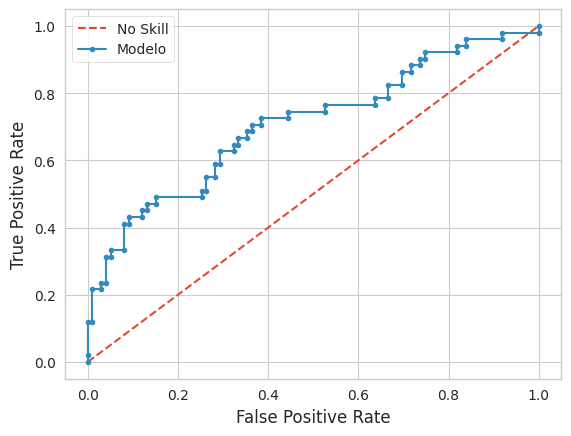

In [ ]:
# Graficamos Curva ROC
ns_probs = [0 for _ in range(len(y_test))]

lr_probs = prob_test

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Modelo: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)


plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Modelo')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [ ]:
auc

0.7076648841354725